KeyError: "['PAULSON & CO.INC.'] not in index"

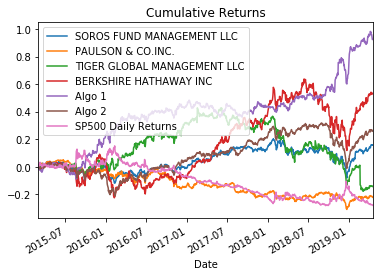

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


#cleaning data
whale_path = Path('C:/Users/johnh/Desktop/PREWORK_JSH/Module-3/PORTFOLIO_HW/Unit4-A-Whale-Off-the-Port-folio-/whale_returns.csv')
whale = pd.read_csv(whale_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
whale.dropna(inplace=True)

algo_path = Path('C:/Users/johnh/Desktop/PREWORK_JSH/Module-3/PORTFOLIO_HW/Unit4-A-Whale-Off-the-Port-folio-/algo_returns.csv')
algo = pd.read_csv(algo_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
algo.dropna(inplace=True)

sp500_path = Path('C:/Users/johnh/Desktop/PREWORK_JSH/Module-3/PORTFOLIO_HW/Unit4-A-Whale-Off-the-Port-folio-/sp500_history.csv') 
sp500 = pd.read_csv(sp500_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500.dtypes
sp500['Close'] = sp500['Close'].str.lstrip('$')
sp500['Close'] = sp500['Close'].astype(float)
sp500 = sp500.pct_change()
sp500.dropna(inplace=True)
sp500_DR = sp500.rename(columns={'Close':'SP500 Daily Returns'})

# Concatenate all DataFrames into a single DataFrame
appended_data = pd.concat([whale,algo,sp500_DR], axis="columns",join="inner")
appended_data.dropna(inplace=True)


#calculate and plot cumulative returns
cm_appended_data = (1+ appended_data).cumprod()-1
cm_appended_data.plot(title='Cumulative Returns')

#box plot to show risk
boxplot = appended_data.boxplot(figsize=(19,6),column=['PAULSON & CO.INC.','SOROS FUND MANAGEMENT LLC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SP500 Daily Returns'])
#'PAULSON & CO. INC'????
boxplot

#daily std
volatility = appended_data.std()
volatility

#annulized std
avt = volatility * np.sqrt(252)
avt.sort_values(inplace=True)
avt

# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
appended_data_rolling_21days = appended_data.rolling(window=21).std().plot(figsize=(20,10),title='Rolling 21 Days STD')

#correlation
appended_data_rolling_21days_noplot = appended_data.rolling(window=21).std()
appended_data_corr = appended_data_rolling_21days_noplot.corr()
appended_data_corr

#calculating bershire hathaway rollign Beta comparing to sp500 
rolling_covar = appended_data['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(appended_data['SP500 Daily Returns'])
rolling_var = appended_data['SP500 Daily Returns'].rolling(window=21).var()
buffet_beta_60days = rolling_covar / rolling_var
buffet_beta_60days.plot(title='Berkshire Hathaway 60 day BETA rolling avg')

#sharpe ratios
sharperatios = ((appended_data.mean() *252) / (avt))
sharperatios.plot.bar()



